In [1]:
import tensorflow as tf
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data and Basic info about data

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(50000, 2)

In [4]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


there are some duplicates values, that we remove later.

In [7]:
df.sentiment.unique()

array(['positive', 'negative'], dtype=object)

# Visualization

C:\Users\vaibh\miniconda3\envs\Ai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


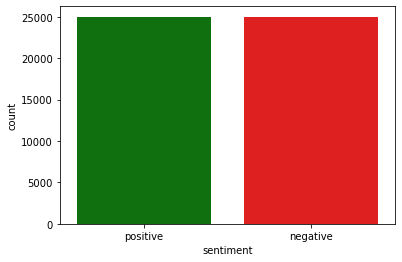

positive    25000
negative    25000
Name: sentiment, dtype: int64


In [8]:
sns.countplot(df.sentiment, palette = ["green", "red"])
plt.show()
print(df.sentiment.value_counts())

# convert out label data in to integer

positive - 1<br>
negative - 0

In [9]:
df.sentiment = [1 if each =="positive" else 0 for each in df.sentiment]

In [10]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Drop duplicates

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(49582, 2)

In [13]:
df.sentiment.value_counts()

1    24884
0    24698
Name: sentiment, dtype: int64

For randomness we have to shuffle our data

In [14]:
from sklearn.utils import shuffle
df = shuffle(df)

In [15]:
df.head()

,review,sentiment
8698,Summer Holiday is the forgotten musical versio...,0
20504,I must say I didn't expect much about this mov...,1
10391,"Like so many other reviewers on here, my memor...",1
30218,"This movie sucked. The acting sucked, the scri...",0
44384,This light hearted comedy should be enjoyed fo...,1


In [16]:
messages=df.copy()
messages

,review,sentiment
8698,Summer Holiday is the forgotten musical versio...,0
20504,I must say I didn't expect much about this mov...,1
10391,"Like so many other reviewers on here, my memor...",1
30218,"This movie sucked. The acting sucked, the scri...",0
44384,This light hearted comedy should be enjoyed fo...,1
...,...,...
1703,There was some good build up of suspense throu...,0
36851,"As said before, the visual effects are stunnin...",0
47481,This was such a waste of time. Danger: If you ...,0
42634,This movie is told through the eyes of a young...,0


In [17]:
messages.reset_index(inplace=True)

In [18]:
messages

,index,review,sentiment
0,8698,Summer Holiday is the forgotten musical versio...,0
1,20504,I must say I didn't expect much about this mov...,1
2,10391,"Like so many other reviewers on here, my memor...",1
3,30218,"This movie sucked. The acting sucked, the scri...",0
4,44384,This light hearted comedy should be enjoyed fo...,1
...,...,...,...
49577,1703,There was some good build up of suspense throu...,0
49578,36851,"As said before, the visual effects are stunnin...",0
49579,47481,This was such a waste of time. Danger: If you ...,0
49580,42634,This movie is told through the eyes of a young...,0


In [19]:
messages.review[0]

"Summer Holiday is the forgotten musical version of Eugene O'Neill's Ah Wilderness and deservedly so with the Broadway musical adaptation of Take Me Along. With the exception of the Stanley Steamer song, none of the other Harry Warren-Ralph Blane songs are worth remembering and even that one is questionable. <br /><br />It was right after the release of this film that MGM let Mickey Rooney go and I don't think it was a coincidence. The film was made in 1946 and released in 1948, so Mickey was 26 playing an Andy Hardy like teenager. He was just way too old for the part of the 17 year old who was affecting radical ideas in a spirit of youthful rebellion.<br /><br />Rooney made four films for MGM from 1946 to 1948, this one, Killer McCoy a remake of Robert Taylor's A Crowd Roars, Love Laughs at Andy Hardy and Words and Music. In all of them Rooney was playing an adult part. Even in the Andy Hardy film, Mickey played an adult Andy Hardy returned from World War II. Why he was in this Louis 

In [20]:
len(messages)

49582

# Text Processing

**Cleaning the data**, **Tokenizing the cleaninig data**

In [21]:
import string
import re
import nltk
from nltk.corpus import stopwords
wn = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
def clean_text(txt):
    stripped = re.sub(r"<br />",' ',txt)
    text = re.sub(r'\d+', '', stripped)#remove numbers
    txt = "".join([c for c in text if c not in string.punctuation]) #remove punctuation
    tokens = nltk.word_tokenize(txt)# tokenizer
    text =  ([wn.lemmatize(word) for word in tokens if word not in stopwords]) #remove stopwords, #lemmatization
    return text 
messages["tok"] = messages["review"].apply(lambda x: clean_text(x.lower())) #lower


In [22]:
messages

,index,review,sentiment,tok
0,8698,Summer Holiday is the forgotten musical versio...,0,"[summer, holiday, forgotten, musical, version,..."
1,20504,I must say I didn't expect much about this mov...,1,"[must, say, didnt, expect, much, movie, turned..."
2,10391,"Like so many other reviewers on here, my memor...",1,"[like, many, reviewer, memory, show, universal..."
3,30218,"This movie sucked. The acting sucked, the scri...",0,"[movie, sucked, acting, sucked, script, sucked..."
4,44384,This light hearted comedy should be enjoyed fo...,1,"[light, hearted, comedy, enjoyed, entertainmen..."
...,...,...,...,...
49577,1703,There was some good build up of suspense throu...,0,"[good, build, suspense, throughout, cinematogr..."
49578,36851,"As said before, the visual effects are stunnin...",0,"[said, visual, effect, stunning, theyre, breat..."
49579,47481,This was such a waste of time. Danger: If you ...,0,"[waste, time, danger, watch, tempted, tear, dv..."
49580,42634,This movie is told through the eyes of a young...,0,"[movie, told, eye, young, teacher, catholic, s..."


In [23]:

#save our prepocessed data
import pickle

pickle_out = open("messages.pickle","wb")
pickle.dump(messages,pickle_out)
pickle_out.close()

In [24]:
#load
import pickle
messages = pickle.load(open("messages.pickle","rb"))

In [25]:
messages

,index,review,sentiment,tok
0,8698,Summer Holiday is the forgotten musical versio...,0,"[summer, holiday, forgotten, musical, version,..."
1,20504,I must say I didn't expect much about this mov...,1,"[must, say, didnt, expect, much, movie, turned..."
2,10391,"Like so many other reviewers on here, my memor...",1,"[like, many, reviewer, memory, show, universal..."
3,30218,"This movie sucked. The acting sucked, the scri...",0,"[movie, sucked, acting, sucked, script, sucked..."
4,44384,This light hearted comedy should be enjoyed fo...,1,"[light, hearted, comedy, enjoyed, entertainmen..."
...,...,...,...,...
49577,1703,There was some good build up of suspense throu...,0,"[good, build, suspense, throughout, cinematogr..."
49578,36851,"As said before, the visual effects are stunnin...",0,"[said, visual, effect, stunning, theyre, breat..."
49579,47481,This was such a waste of time. Danger: If you ...,0,"[waste, time, danger, watch, tempted, tear, dv..."
49580,42634,This movie is told through the eyes of a young...,0,"[movie, told, eye, young, teacher, catholic, s..."


In [26]:
data = messages[["tok", "sentiment"]]

In [27]:
data
#built my dataset

,tok,sentiment
0,"[summer, holiday, forgotten, musical, version,...",0
1,"[must, say, didnt, expect, much, movie, turned...",1
2,"[like, many, reviewer, memory, show, universal...",1
3,"[movie, sucked, acting, sucked, script, sucked...",0
4,"[light, hearted, comedy, enjoyed, entertainmen...",1
...,...,...
49577,"[good, build, suspense, throughout, cinematogr...",0
49578,"[said, visual, effect, stunning, theyre, breat...",0
49579,"[waste, time, danger, watch, tempted, tear, dv...",0
49580,"[movie, told, eye, young, teacher, catholic, s...",0


In [28]:
X = data["tok"]
Y = data["sentiment"]

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33219,)
(33219,)
(16363,)
(16363,)


In [31]:
X_train

29358    [savage, island, raw, savagery, scare, hell, t...
36192    [evil, big, house, bad, spirit, foolishly, unl...
35870    [tumbling, doll, flesh, tamakichi, anaru, japa...
15397    [vertigo, costars, stewart, last, turn, romant...
36329    [following, classic, horror, film, carrie, off...
                               ...                        
21243    [jack, black, kyle, gas, team, together, promo...
45891    [one, best, film, seen, past, five, year, cast...
42613    [kidding, godawful, watching, local, scifi, st...
43567    [honest, rented, movie, solely, fact, part, ch...
2732     [taken, context, time, made, found, worthwhile...
Name: tok, Length: 33219, dtype: object

In [32]:
y_train

29358    1
36192    0
35870    1
15397    1
36329    0
        ..
21243    1
45891    1
42613    0
43567    1
2732     1
Name: sentiment, Length: 33219, dtype: int64

In [33]:
import numpy as np
from keras.preprocessing.text import Tokenizer

max_feature = 20000
tokenizer = Tokenizer(num_words = max_feature)

In [34]:
tokenizer.fit_on_texts(X_train)
X_train_features = np.array(tokenizer.texts_to_sequences(X_train))

X_test_features = np.array(tokenizer.texts_to_sequences(X_test))

C:\Users\vaibh\miniconda3\envs\Ai\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
C:\Users\vaibh\miniconda3\envs\Ai\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


In [35]:
X_test_features

array([list([2879, 1730, 242, 9303, 20, 2881, 16026, 215, 326, 8345, 2762, 33, 20, 128, 57, 2452, 10, 13, 17115, 1730, 1566, 3672, 38, 3881, 8211, 761, 2912, 1152, 9, 74, 2, 1730, 366, 10, 11910, 3, 441, 6873, 101, 4475, 68, 4344, 890, 6769, 15375, 7234, 238, 14802, 4344, 469, 1062, 5569, 1383, 8577, 3246, 54, 12752, 7153, 644, 2051, 530, 1062, 158, 713, 7153, 14702, 1160, 2236, 2236, 913, 7153, 7301, 1142, 2334, 1064, 644, 203, 367, 4344, 729, 41, 1326, 776, 4344, 2157, 3176, 1900, 3477, 3503, 3786, 7153, 262, 1383, 644, 4344, 450, 407, 30, 278, 166, 7153, 5853, 4344, 1751, 1149, 4796, 14654, 68, 41, 7153, 2100, 218, 41, 626, 4344, 8, 484, 7153, 1062, 7566, 2147, 277, 167, 8, 12014, 636, 346, 15998, 518, 3152, 33, 71, 6703, 8203, 2447, 257, 4344, 7153, 181, 65, 128, 16408, 8345, 2762]),
       list([5, 921, 493, 3870, 1091, 12481, 1059, 32, 310, 104, 178, 826, 2, 4124, 64, 30, 151, 96, 1049, 1234, 3827, 2604, 48, 36, 537, 9505, 6307, 3360, 3078, 8768, 2, 1021, 1220, 163, 708, 33, 64, 

# Text Sequencing

In [37]:
#padding
from keras.preprocessing.sequence import pad_sequences

In [38]:
X_train_features = pad_sequences(X_train_features,padding="post",truncating="post", maxlen = 50 )
X_test_features = pad_sequences(X_test_features,padding="post",truncating="post", maxlen= 50)

In [39]:
X_train_features[0]

array([ 2774,   733,  2624, 17908,  1344,   437,  1571,   202,  6413,
        2774,   121,   278,   383, 15343,  3232,  5466,  2774,    58,
         999,   437,   433,    77,    10,    64,   100,     2,   268,
         284,   100,   151,    21,  1256,   304,   575,    52,   190,
         350,  1925,  1632,     2,   506,  2273,  1369,  3155,   449,
        3755,   352,  5944,  1058,     8])

In [40]:
X_train_features.shape

(33219, 50)

In [41]:
X_test_features[0]

array([ 2879,  1730,   242,  9303,    20,  2881, 16026,   215,   326,
        8345,  2762,    33,    20,   128,    57,  2452,    10,    13,
       17115,  1730,  1566,  3672,    38,  3881,  8211,   761,  2912,
        1152,     9,    74,     2,  1730,   366,    10, 11910,     3,
         441,  6873,   101,  4475,    68,  4344,   890,  6769, 15375,
        7234,   238, 14802,  4344,   469])

# Label encoding

In [42]:
 from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(y_train.values)
test_y = le.transform(y_test.values)

In [43]:
train_y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [44]:
test_y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [45]:
idx = tokenizer.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))

def return_to_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [47]:
print(return_to_sentence(X_train_features[0]))

savage island raw savagery scare hell trust boy estranged savage family run city slicker tourist pa savage want revenge hell stop nothing get real horror film truly wonderful horror moment also negative review clearly come someone lack proper knowledge film filmmaker chose lighting camerawork order reflect dark murky mood story


In [48]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding,LSTM
from tensorflow.python.keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam
from keras.layers import Dropout

In [49]:
model = Sequential()

embedding_size = 50

model.add(Embedding(input_dim=20000,output_dim=embedding_size,input_length=50,name='embedding_layer'))

model.add(LSTM(units=16, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=8, return_sequences=True))
model.add(Dropout(0.1))

model.add(LSTM(units=4))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(lr=1e-3)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 50, 50)            1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 50, 16)            4288      
_________________________________________________________________
dropout (Dropout)            (None, 50, 16)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 8)             800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 8)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0

In [53]:
history = model.fit(X_train_features, y_train, validation_split=0.3, epochs=5, batch_size=1000, shuffle=True, verbose = 1)

Epoch 1/5
24/24 [==============================] - 84s 3s/step - loss: 0.6913 - accuracy: 0.5426 - val_loss: 0.6748 - val_accuracy: 0.6856
Epoch 2/5
24/24 [==============================] - 66s 3s/step - loss: 0.6382 - accuracy: 0.7153 - val_loss: 0.4884 - val_accuracy: 0.7987
Epoch 3/5
24/24 [==============================] - 65s 3s/step - loss: 0.4351 - accuracy: 0.8413 - val_loss: 0.4396 - val_accuracy: 0.8198
Epoch 4/5
24/24 [==============================] - 63s 3s/step - loss: 0.3396 - accuracy: 0.9043 - val_loss: 0.4354 - val_accuracy: 0.8210
Epoch 5/5
24/24 [==============================] - 62s 3s/step - loss: 0.2765 - accuracy: 0.9309 - val_loss: 0.4414 - val_accuracy: 0.8200


In [55]:
result = model.evaluate(X_test_features, y_test)

512/512 [==============================] - 76s 148ms/step - loss: 0.4501 - accuracy: 0.8159


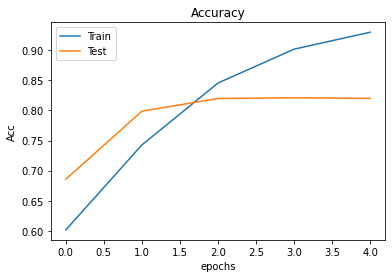

In [56]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

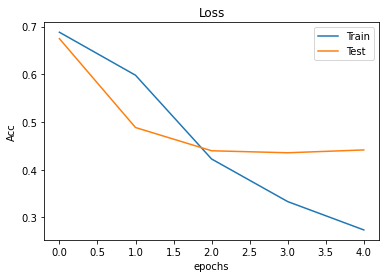

In [57]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()